# <center>Projet Cassiopée </center>

##  <center> Sequential Monte Carlo methods </center>

State space models are bivariate stochastic procceses $\{(Y_i,Z_i)\}_{i \geq 1}$ where the state sequence $(Z_i)_{i \geq 1}$ is a Markov chain which is only paritally observed through the sequence $(Y_i)_{i \geq 1}$.
- $(Z_i)_{i \geq 1}$ is a Markov chain ;
- $(Y_i)_{i \geq 1}$ observations : **Conditionnally on the sequence $(Z_i)_{i\geq 1}$**, the observations are independent. $\forall l \geq 1$, the **conditionnal** distribution of $Y_l$ **given** $(Z_i)_{\geq 1}$ depends on $Z_l$ only ;

### Conditionnally Linear and Gaussian Models (CLGM)
##### State equation :  $\ \ \ \forall i \geq 2,\ \ \ Z_i=d_{a_i}+T_{a_i}Z_{i-1} +H_{a_i}\epsilon_i\ \ \ \ \ \ \ (1)$ 

 where :
 
 - $\epsilon_i \overset{i.i.d}{\sim}\mathcal{N}(0_m, I_m)$ ; 
 
 - $(a_i)_{i\geq 1}$, regimes, homogeneous Markov chain $\in \{1,\ldots,J\}$ with initial distribution $\pi$ and transition matrix $Q$ ;
 
 - $\forall j \in \{1,\ldots, J\}$, $H_j \in S_m^{++}$, $d_j \in \mathbb{R}^m$, $T_j \in S_m^{++}$ ;
 
 - $Z_1 \sim \mathcal{N}(\mu_1,\Sigma_1)$ independent of $(\epsilon_i)_{i \geq 2}$
 
##### Observation equation : $\ \ \ \forall i\in \{1,\ldots,n\},\ \ \ Y_i=c_{a_i}+B_{a_i}Z_{i} +G_{a_i}\eta_i\ \ \ \ \ \ \ (2)$ 


where :

- $\eta_i$ i.i.d p-dim Gaussian vectors independent of $(\epsilon_i)_{i\geq 2}$ and $Z_1$ ;

- $G_j \in S_p^{++}$, $c_j \in \mathbb{R}^p$ and $B_j \in \mathbb{R}^{p\times m}$

### Rao-Blackwellized smoothing algorithms
We define and note, 

- For a given matrix $M$, $\ \ \ \ \bar{M}=MM^T$ ;

- If $A\in S_m^{++}$, $\forall z \in \mathbb{R}^m$ :     $\ \ \ \ \|z\|^2_A:=z^T A^{-1}z$ ;

- Probability density of of the conditional distribution of $Z_i$ given $(a_i,z_{i-1})$ : 

$$m(a_i,z_{i-1};z_i)=|2\pi \bar{H}_{a_i}|^{-\frac{1}{2}} \exp\{-\frac{1}{2} \|z_i-d_{a_i}-T_{a_i}z_{i-1}\|^2_{\bar{H}_{a_i}}\}$$

- Probability density of of the conditional distribution of $Y_i$ given $(a_i,z_{i})$ : 

$$g(a_i,z_{i};y_i)=|2\pi \bar{G}_{a_i}|^{-\frac{1}{2}} \exp\{-\frac{1}{2} \|y_i-c_{a_i}-B_{a_i}z_{i}\|^2_{\bar{G}_{a_i}}\}$$


#### Forward Filter (FF)
Approximate $p(a_{1:i},z_i|y_{1:i})$ by

$$p^N(a_{1:i},z_i|y_{1:i})=\underset{k=1}{\overset{N}{\sum}}\ \omega^k_ip(z_i|a^k_{1:i},y_{1:i})\ \delta_{a^k_{1:i}}(a_{1:i})$$

where $(a^k_{1:i})_{1\leq k\leq N}$ produced sequence of trajectories associated with normalized importance weights $(\omega^k_{1:i})_{1\leq k\leq N}$ and $Z_i|a^k_{1:i}, Y_{1:i} \sim \mathcal{N}(\mu^k_i,P^k_i)$ 

##### Initialisation :
- At time $i$ and $\forall\ 1\leq j \leq J$ : $\ \ \ \ \mu_{1|0}^j=c_j+B_j\mu_1$ and $P^j_{1|0}=B_j\Sigma_1B^T+\bar{G}_j\ \ \ \ \ $  see $(2)$

- $(a^k_{1})_{1\leq k\leq N}$ sampled in $\{1,\ldots,N\}$ (each particle is associated with $\omega^k_1=\frac{1}{N}$) with probabilities proportional to 
<center> $\pi_jp(a_1=j|y_1)\propto \pi_j|P^j_{1|0}|^{-\frac{1}{2}}\exp\{-\frac{1}{2}(y_1-\mu_{1|0}^j)^T(P_{1|0}^j)^{-1}(y_1-\mu_{1|0}^j)\}$</center>

Kalman Filter :
- $$K_1^k=\Sigma_1 B_{a_1^k}^T(B_{a_1^k}\Sigma_1B_{a_1^k}^T+\bar{G}_{a_1^k})^{-1}\ \ ,$$


- $$\mu_1^k=\mu_1+ K^k_1(Y_1-c_{a_1^k}-B_{a_1^k}\mu_1)\ \ ,$$


- $$P_1^k=(I_m- K^k_1B_{a_1^k})\Sigma_1, \ \ \ \ \ \ \ \ \ \ \ \ \ \  \ \ \ \  $$

##### Iterations :

Extend the trajectories $(a^k_{1:i-1})_{1\leq k \leq N}$ at time i.

We note : $\gamma_i^{j,k}:=p(y_i|a_i=j,a^k_{1:i-1},y_{1:i-1})Q(a^k_{i-1},j)$

Since, $Y_i|a^k_{1:i-1},a_i, Y_{1:i-1} \sim \mathcal{N}(c_{a_i}+B_{a_i}\mu^k_{i|i-1}(a_i), B_{a_i}P^k_{i|i-1}(a_i)B_{a_i}^T+\bar{G}_{a_i})$

Therefore, 
$$\gamma_i^{j,k}\propto Q(a^k_{i-1},j)|B_{j}P^k_{i|i-1}B_{j}^T+\bar{G}_{j}|^{-\frac{1}{2}} \exp\{-\frac{1}{2}\|y_i-c_{j}-B_{j}\mu^{j,k}_{i|i-1}\|^2_{B_{j}P^k_{i|i-1}B_{j}^T+\bar{G}_{j}}\}$$

where : 

- $$\mu^k_{i|i-1}=\mu^k_{i|i-1}(j)=d_j+T_j\mu^k_{i-1}\ \ \ \ \ \ \ $$


- $$P^k_{i|i-1} = P^k_{i|i-1}(j)=T_j P^k_{i-1} T_j^T +\bar{H}_j$$


$\forall k \in \{1,\ldots,N\}$, an ancestral path is chosen with probabilities proportional to $(\omega^k_{i-1})_{1 \leq k \leq N}$. 

Then, the new regime $a_i^k$ is sampled in $\{1,\ldots,J\}$ with probabilities proportional to $(\gamma^{j,k}_i)_{1 \leq j \leq J}$. 

Only ancestral paths that have been selected using the imprtance weights $(\omega^k_{i-1})_{1 \leq k \leq N}$ are extended at time $i$. (This is improved by considering all the offsprings of all ancestral trajectories $(a^k_{1:i-1})_{1 \leq k \leq N}$. Each ancestral path has $J$ offsprings at time $i$ then, we choose a given number of trajectories at time $i$ among the  $NJ$ possible paths).

To obtain the weight associated with each offspring
write the following approximation of $p(a_{1:i}|y_{1:i})$ based on the weighted samples at time $i-1$ :

$$p^N(a_{1:i}|y_{1:i}) \propto \underset{k=1}{\overset{N}{\sum}}\underset{j=1}{\overset{J}{\sum}}\omega^k_{i-1} \gamma^{j,k}_i\delta_{(a^k_{1:i-1},j)}(a_{1:i}) $$


Therefore, each ancestral trajectory of the form $(a^k_{1:i-1},j)$,$ 1\leq k\leq N$, $1\leq j \leq J$ is associated with the normalised weight $\tilde{\omega}_i^{j,k} \propto \omega_i^{j,k} \gamma_i^{j,k} $.
( We might use **KL-OS** or **CS-OS** to associate a new weight to each of the $NJ$ tajectories, if the new weight is null then the particle can be removed).

#### Rao-Blackwellized Forward Filter Backward Simulator (FFBSi)

The aim is to sample the regime backward in time. We want to compute $p(a_{1:n}|y_{1:n})$.

$$\forall i \in \{1,\ldots,n-1\}, \ \ p(a_{1:n}|y_{1:n})=p(a_{1:i}|a_{i+1:n},y_{1:n}).p(a_{i+1:n}|y_{1:n})$$

We note that the first factor on the right hand side is neverthless more difficult to handle because it itself relies on all the observations. Therefore, we consider the following decomposition : 
$p(a_{1:i}|a_{i+1:n},y_{1:n})\propto p(a_{i+1:n},y_{i+1:n}|a_{1:i},y_{1:i}).p(a_{1:i}|y_{1:i})$

The second factor can be approximated using the ancestral trajectories $(a^k_{1:i})_{1\leq k\leq N}$ and the associated importance weights $(\omega^k_i)_{1\leq k\leq N}$ by, 

$$p^N(a_{1:i}|a_{i+1:n},y_{1_n})=\underset{k=1}{\overset{N}{\sum}}\overset{\sim}{\omega}^k_{i|n}\delta_{a^k_{1:i}}(a_{1:i})$$
Where $\overset{\sim}{\omega}^k_{i|n}\propto \omega^k_i\  p(a_{i+1:n},y_{i+1:n}|a^{k}_{1:i},y_{1:i})$

Assume that we have run a backward simulator from time $n$ to time $i+1$. Hence, we have generated a partial backward trajectory $\overset{\sim}{a}_{i+1:n}$, which is an approximate sample from $p(a_{i+1:n}|y_{1:n})$.
To extend this trajectory to time $i$, we draw one of the Rao-Blackwellized Particle Filter particules $(a^k_{1:i})_{1\leq k\leq N}$ with probabilities $(\overset{\sim}{\omega}^k_{i|n})_{1\leq k\leq N}$. We then set $\overset{\sim}{a}_{i:n}=\{a^k_i,\overset{\sim}{a}_{i+1:n}\}$ and discard $a^k_{1:i-1}$.

This procedure is then reproduced for each time $i=n-1,...,1$ resulting in a complete backward trajectory $\overset{\sim}{a}_{1:n}$.


In [2]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [3]:
def regimes(J,P0,Q,n):
    # n : number of observations
    # J : integer defining the finite space {1,...,J}, the values of the regimes 
    # P0 : initial distribution
    # Q : transition matrix
    
    a=np.zeros(n)
    vj=np.arange(0,J)
    
    '''p=rd.random()
    Psum=np.cumsum(P0)
    k=0
    while p>Psum[k]:
        k=k+1
    a[0]=k+1
    '''
    #a[0]=np.random.multinomial(1,P0).dot(vj)
    a[0]=np.argmax(np.random.multinomial(1,P0))
    
    '''Qsum=np.cumsum(Q,axis=1)'''
    for i in range(1,n):
        #a[i]=np.random.multinomial(1,Q[int(a[i-1])]).dot(vj)
        a[i]=np.argmax(np.random.multinomial(1,Q[int(a[i-1])]))
        
        '''p=rd.random()
        k=0
        while p>Qsum[int(a[i-1])-1][k]:
            k=k+1
        a[i]=k+1'''
    return a

In [4]:
# Test
Q= np.array([[0.6,0.1,0.3],[0.1,0.7,0.2],[0.2,0.3,0.5]])
P0=np.array([0.5,0.4,0.1])
regimes(3,P0,Q,100)

array([1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 2., 2., 2., 2., 1., 0., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 0., 2., 1., 1., 1., 1., 1., 0., 0., 0., 2., 2., 1., 0., 0., 0.,
       0., 0., 2., 2., 0., 0., 0., 0., 2., 2., 0., 0., 2., 2., 1., 2., 2.,
       2., 2., 2., 2., 1., 2., 2., 0., 0., 2., 0., 0., 1., 2., 2., 1., 1.,
       1., 0., 0., 0., 2., 2., 1., 1., 1., 1., 1., 1., 2., 0., 1.])

In [5]:
def create_states(d,T,H,mu1,sigma1,regimes):
    # d : list of the J m-vectors dj;
    # T, H : lists of the J mxm-positive-definite matrices Tj and Hj, T=[T1,T2,...,TJ] ;
    # mu1, sigma1 : mean and variance of the m-Gaussian rdvar Z1 ;
    # n : number of trajectories ;
    
    m=np.shape(d[0])[0]
    n=np.shape(regimes)[0]
    states=[]
    states.append(np.array([np.random.normal(mu1,sigma1)]))
    for i in range(1,n):
        epsilon_i=np.random.normal(np.zeros(m),np.eye(m))
        a_i=int(regimes[i])
        states.append(d[a_i]+T[a_i].dot(states[i-1])+H[a_i].dot(epsilon_i))
    return states     

In [6]:
def create_observations(c,B,G,states,regimes,mu,sigma):
    # c : list of the J p-vectors cj ;
    # B : list of the J pxm-matrices Bj ;
    # G : list of the J pxp-positive-definite matrices Gj ;
    # mu, sigma : mean and variance of the i.i.d p-Gaussian vectors eta_i ;
    
    p=np.shape(c[0])[0]
    m=np.shape(states[0])[0]
    n=np.shape(regimes)[0]
    observations=[]
    for i in range(n):
        eta_i=np.random.normal(mu,sigma)
        a_i=int(regimes[i])
        observations.append(c[a_i]+B[a_i].dot(states[i])+G[a_i].dot(eta_i))
    return observations

In [7]:
def norm_squared(z,A):
    # z is a m vector
    # A is a positive-definite matrix
    return np.transpose(np.asarray(z)).dot(np.linalg.inv(np.asarray(A)).dot(np.asarray(z)))    

In [8]:
def bar(A):
    return A.dot(np.transpose(A))

In [9]:
def Kalman_pred(c,B,G,mu,sigma):
    mu_pred= c+B.dot(mu)
    P_pred= B.dot(sigma.dot(np.transpose(B)))+ bar(G)
    return mu_pred,P_pred
    
def Kalman_update(c,B,G,mu,sigma,y):
    K=np.array([sigma.dot(np.transpose(B).dot(np.linalg.inv(np.array([B.dot(sigma.dot(np.transpose(B)))+bar(G)]))))])
    mu_u=mu+K.dot(y-c-B.dot(mu))
    m=np.shape(B)[0]
    P_u=(np.eye(m)-K.dot(B)).dot(sigma)
    return mu_u,P_u

In [10]:
def Initialisation(c,B,G,mu1,sigma1,Pi,Y,N):
    # Initialization : i=1
    mu_1_0=[]
    P_1_0=[]
    J=len(Pi)
    P_sample=np.zeros(J)
    s=0
    for j in range(J):
        mu_1_0_j,P_1_0_j=Kalman_pred(c[j],B[j],G[j],mu1,sigma1)
        P_1_0.append(P_1_0_j)
        P_sample_j=Pi[j]*((np.linalg.det(np.array([P_1_0_j]))**(-0.5))*np.exp(-0.5*norm_squared(Y[0]-mu_1_0_j,np.array(
            [P_1_0_j]))))
        P_sample[j]=P_sample_j
        s+=P_sample_j
    
    P_sample_norm=P_sample/s
    vj=np.arange(0,J)
    a=[]
    omega=[]
    P_1_1=[]
    mu_1_1=[]
    (m,p)=np.shape(np.array([B[0]]))
    for k in range(N):
        a.append([int(np.random.multinomial(1,np.ndarray.flatten(P_sample_norm)).dot(vj))])
        omega.append([1/N])
        mu_1_1_k,P_1_1_k=Kalman_update(c[a[k][0]],B[a[k][0]],G[a[k][0]],mu1,sigma1,Y[0])
        mu_1_1.append(mu_1_1_k)
        P_1_1.append(P_1_1_k)
    return mu_1_1,P_1_1,a,omega

In [11]:
def resampling(a_sample,omega_sample,J,N):
    omega_resampled=[]
    a_resampled=[]
    v=np.arange(N)
    s=0
    for i in range(N):
        p=np.random.multinomial(1,omega_sample)
        a_resampled.append(int(p.dot(a_sample)))
        s+=omega_sample[int(p.dot(v))]
        omega_resampled.append(omega_sample[int(p.dot(v))])
    for i in range(N):
        omega_resampled[i]=omega_resampled[i]/s
    return a_resampled,omega_resampled

In [12]:
def forward_filter(c,d,B,G,T,H,mu1,sigma1,Pi,Y,N):
    J=len(Pi)
    P=[]
    mu=[]
    mu_1_1,P_1_1,a,omega=Initialisation(c,B,G,mu1,sigma1,Pi,Y,N)
    P.append(P_1_1)
    mu.append(mu_1_1)
    vj=np.arange(0,J)
    z_0=0
    for l in range(N):
        z_0+=omega[l][0]*mu_1_1[l]
    
    Z=[]
    Z.append(z_0)
    for i in range(1,n):
        s1=0
        mu_i=[]
        P_i=[]
        omega_sample=np.zeros(N)
        a_sample=np.zeros(N)
        
        for k in range(N):
            gamma_i_k=np.zeros(J)
            S=0
            
            # Computation of gamma and normalization
            for j in range(J):
                mu_pred_j,P_pred_j=Kalman_pred(d[j],T[j],H[j],mu[i-1][k],P[i-1][k])   
                gamma_i_k[j]=(Q[int(a[k][i-1])][j])*((
                    np.linalg.det(np.array([B[j].dot(P_pred_j.dot(np.transpose(B[j])))+bar(G[j])])))**(-0.5))*(
                    np.exp(-0.5*norm_squared(
                        Y[i]-c[j]-B[j].dot(mu_pred_j),[B[j].dot(P_pred_j.dot(np.transpose(B[j])))+bar(G[j])])))
                
                S+=gamma_i_k[j]
            
            gamma_i_k=gamma_i_k/S
            
            # MC Sampling of new regime
            a_i_k=int(np.random.multinomial(1,gamma_i_k).dot(vj))
            a[k].append(a_i_k)
            a_sample[k]=a_i_k
            
            # Update importance weights
            omega_i_k=omega[k][i-1]*S
            omega[k].append(omega_i_k)
            s1+=omega_i_k
            
            
            # Uptade mean and variance
            mu_pred,P_pred=Kalman_pred(d[a_i_k],T[a_i_k],H[a_i_k],mu[i-1][k],P[i-1][k])
            mu_i_k,P_i_k=Kalman_update(c[a_i_k],B[a_i_k],G[a_i_k],mu_pred,P_pred,Y[i])
            mu_i.append(mu_i_k)
            P_i.append(P_i_k)
        
        mu.append(mu_i)
        P.append(P_i)
        
        # Normalization importance weights
        for l in range(N):
            omega[l][i]=omega[l][i]/s1
            omega_sample[l]=omega[l][i]
        
        
        # Resampling
        a_resampled,omega_resampled=resampling(a_sample,omega_sample,J,N)
        for k in range(N):
            a[k][i]=a_resampled[k]
            omega[k][i]=omega_resampled[k]
        
        # Estimate state
        z_i=0
        for k in range(N):
            z_i+= omega[k][i]*mu[i][k]
        Z.append(z_i)        
    return Z,a,omega,mu,P

In [13]:
def MSE(x,y):
    l=len(x)
    mse=[0]*l
    for i in range(l):
        mse[i]=(x[i]-y[i])**2
    return np.array([mse]).mean()

In [14]:
def filtre_kalman(c,d,B,G,T,H,mu,sigma,y):
    n=len(y)
    Z=[]
    P=[]
    mu_pred,P_pred=Kalman_pred(d,T,H,mu,sigma)
    mu_1,P_1=Kalman_update(c,B,G,mu_pred,P_pred,y[0])
    Z.append(mu_1)
    P.append(P_1)
    for k in range (1,n):
        mu_pred,P_pred=Kalman_pred(d,T,H,Z[k-1],P[k-1])
        mu_k,P_k=Kalman_update(c,B,G,mu_pred,P_pred,y[k])
        Z.append(mu_k)
        P.append(P_k)
    return Z,P[n-1]

In [15]:
def regime_proba(a,omega,J):
    # compute regimes probabilities
    # a : paths
    # omega : importance weights
    
    n=len(a[0])
    N=len(a)
    L=[]
    for i in range(n):
        l_i=np.zeros(J)
        for k in range(N):
            l_i[a[k][i]]= l_i[a[k][i]] + omega[k][i]
        L.append(l_i)
    return L 

In [16]:
def regime_predicted(reg_proba):
    # predict the regimes given their probabilities
    
    L=[]
    n=len(reg_proba)
    for i in range(n):
        L.append(np.argmax(reg_proba[i]))
    return L

In [17]:
def switch_detection(regime):
    # detect regime shifts
    
    n=len(regime)
    L=n*[0]
    L[0]=regime[0]
    indices=[]
    for k in range(1,n):
        if regime[k]!=regime[k-1] :
            L[k]=1
            indices.append(k)
    return L,indices

In [18]:
def Regime_error(regime,reg_pred):
    # error btwn true regimes and predicted regimes
    
    n=len(regime)
    s=0
    for k in range(n):
        if regime[k]!=reg_pred[k] :
            s+=1
    return s/n


## Backward Simulator

In [19]:
def compute_Omega(a,T,H,Omega_hat):
    # a (i+1)th regime
    m=np.shape(T[0])[0]
    M_i_1=np.transpose(H[a]).dot(np.asarray(Omega_hat).dot(H[a]))+np.eye(m)
    
    Omega_i=np.transpose(T[a]).dot(np.eye(m)-np.asarray(Omega_hat).dot(norm_squared(np.transpose(H[a]),M_i_1))).dot(
        np.asarray(Omega_hat).dot(T[a]))
    return Omega_i

In [20]:
def compute_lambda(a,T,H,d,Omega_hat,lambda_hat):
    # a (i+1)th regime
    m=np.shape(T[0])[0]
    m_i_1=lambda_hat-np.asarray(Omega_hat).dot(d[a])
    M_i_1=np.transpose(H[a]).dot(np.asarray(Omega_hat).dot(H[a]))+np.eye(m)
    
    lambda_i=np.transpose(T[a]).dot(np.eye(m)-np.asarray(Omega_hat).dot(norm_squared(np.transpose(H[a]),M_i_1))).dot(m_i_1)
    return lambda_i

In [21]:
def compute_Omega_hat(a,B,G,Omega_i):
    # a i th regime
    return Omega_i + norm_squared(B[a],np.array([np.array([bar(G[a])])]))
    

In [22]:
def compute_lambda_hat(a,B,G,lambda_i,Y_i):
    # a i th regime
    return lambda_i + np.transpose(B[a]).dot(np.linalg.inv(np.array([np.array([bar(G[a])])])).dot(Y_i-c[a]))    

In [23]:
def compute_Lambda(Omega,P,m):
    Gamma=np.linalg.cholesky(np.array([P]))
    return np.transpose(Gamma).dot(np.asarray(Omega).dot(Gamma))+np.eye(m)

In [24]:
def compute_eta(mu,Omega,lambda_,P,Lambda):
    Gamma=np.linalg.cholesky(np.array([P]))
    return norm_squared(mu,np.linalg.inv(np.array([np.array([Omega])])))-2*np.transpose(
        np.asarray(lambda_)).dot(mu)-norm_squared(
        np.transpose(Gamma).dot(lambda_-np.asarray(Omega).dot(mu)),Gamma)

In [25]:
#Rao–Blackwellized FFBSi

def backward_simulator(a,omega,mu,P,B,G,T,H,c,d,y):
    
    # Initialisation
    n=len(omega[0])
    N=len(omega)
    m=np.shape(T[0])[0]
    
    a_tilde=[0]*n
    omega_tilde=[0]*n
    omega_tilde_n=np.zeros(N)
    for k in range(N):
        omega_tilde_n[k]=omega[k][n-1]
    
    a_tilde[n-1]=a[int(np.argmax(np.random.multinomial(1,omega_tilde_n)))][n-1]
    omega_tilde[n-1]=omega_tilde_n[a_tilde[n-1]]
    
    Omega_hat=[0]*n
    lambda_hat=[0]*n
    
    Omega_hat[n-1]=norm_squared(B[a_tilde[n-1]],np.array([np.array([bar(G[a_tilde[n-1]])])]))
    lambda_hat[n-1]=np.transpose(B[a_tilde[n-1]]).dot(np.linalg.inv(np.array([np.array([bar(G[a_tilde[n-1]])])])).dot(y[n-1]-c[a_tilde[n-1]]))
    
    Omega=[0]*n
    lambda_=[0]*n
       
    Lambda_i=[0]*N
    eta_i=[0]*N
    omega_tilde_k=np.zeros(N)
    for i in range(n-2,-1,-1):
        Omega[i]=compute_Omega(a_tilde[i+1],T,H,Omega_hat[i+1])
        lambda_[i]=compute_lambda(a_tilde[i+1],T,H,d,Omega_hat[i+1],lambda_hat[i+1])
        
        S=0
        for k in range(N):
            Lambda_i[k]=compute_Lambda(Omega[i],P[i][k],m)
            eta_i[k]=compute_eta(mu[i][k],Omega[i],lambda_[i],P[i][k],Lambda_i[k])
            omega_tilde_k[k]=omega[k][i]*Q[a[k][i]][a_tilde[i+1]]*(np.linalg.det(Lambda_i[k])**(-0.5))*np.exp(-0.5*eta_i[k])
            S+=omega_tilde_k[k]
        omega_tilde_k=omega_tilde_k/S
        a_tilde[i]=a[int(np.argmax(np.random.multinomial(1,omega_tilde_k)))][i]
        omega_tilde[i]=omega_tilde_n[a_tilde[i]]
        Omega_hat[i]=compute_Omega_hat(a_tilde[i],B,G,Omega[i])
        lambda_hat[i]=compute_lambda_hat(a_tilde[i],B,G,lambda_[i],y[i])    
           
    
    P_tilde_T=[]
    mu_tilde_T=[]
    P_tilde_t=[]
    mu_tilde_t=[]
    mu_1_0,P_1_0=Kalman_pred(c[a_tilde[0]],B[a_tilde[0]],G[a_tilde[0]],mu1,sigma1)
    mu_1_1,P_1_1=Kalman_update(c[a_tilde[0]],B[a_tilde[0]],G[a_tilde[0]],mu_1_0,P_1_0,y[0])
    P_tilde_t.append(P_1_1)
    mu_tilde_t.append(mu_1_1)
    P_tilde_T.append(np.linalg.inv(np.linalg.inv(np.array([np.array([P_tilde_t[0]])]))+Omega[0]))
    mu_tilde_T.append(np.asarray(P_tilde_T[0]).dot(
        np.linalg.inv(np.array([np.array([P_tilde_t[0]])])).dot(np.asarray(mu_tilde_t[0]))+lambda_[0]))
    for i in range(1,n):
        mu_pred_i,P_pred_i=Kalman_pred(d[a_tilde[i]],T[a_tilde[i]],H[a_tilde[i]],mu_tilde_t[i-1],P_tilde_t[i-1])
        mu_i,P_i=Kalman_update(c[a_tilde[i]],B[a_tilde[i]],G[a_tilde[i]],mu_pred_i,P_pred_i,y[i])
        P_tilde_t.append(P_i)
        mu_tilde_t.append(mu_i)
        P_tilde_T.append(np.linalg.inv(np.linalg.inv(np.array([np.array([P_i])]))+Omega[i]))
        mu_tilde_T.append(np.asarray(P_tilde_T[i]).dot(np.linalg.inv(np.array([np.array([P_i])])).dot(np.asarray(mu_i))+lambda_[i]))
    return a_tilde,mu_tilde_T,P_tilde_T,omega_tilde 

In [26]:
def regime_proba1(a,omega,J):
    # compute regimes probabilities
    # a : paths
    # omega : importance weights
    
    n=len(a)
    L=[]
    for i in range(n):
        l_i=np.zeros(J)
        l_i[a[i]]= l_i[a[i]] + omega[i]
        L.append(l_i)
    return L 

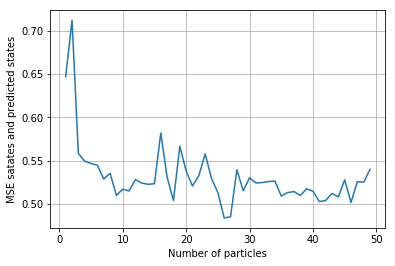

In [113]:
nb=np.arange(1,50)
e=[]
for k in nb:
    z_predicted,*_=forward_filter(c,d,B,G,T,H,mu1,sigma1,P0,observations,k)
    e.append(MSE(z_predicted,states))
plt.plot(nb,e)
plt.xlabel('Number of particles', fontsize=10)
plt.ylabel('MSE satates and predicted states', fontsize=10)
plt.grid(True)

MSE for the estimate using FF :  0.17239022373492974
MSE for the estimate using KF :  0.17233796500162343
MSE for the observations :  0.5126146954854628


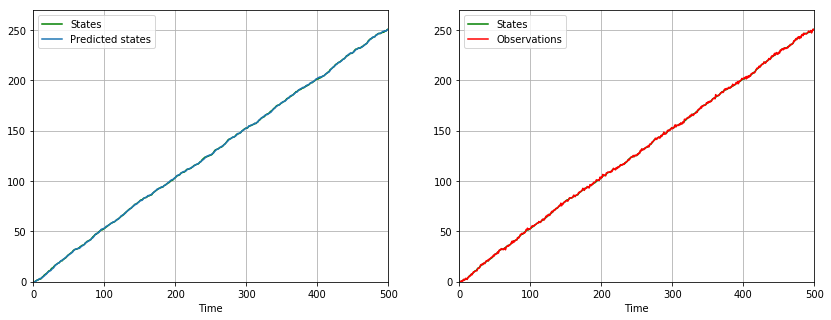

In [27]:
J1=1
P0=np.array([1])
d=[np.array([0.5])]
c=[np.array([0.1])]
T=[np.array([1])]
Q=np.array([[1]])
B=[np.array([1])]
H=[np.array([0.1**0.5])]
G=[np.array([0.5**0.5])]

d1=np.array([0.5])
c1=np.array([0.1])
T1=np.array([1])
Q1=np.array([[1]])
B1=np.array([1])
H1=np.array([0.1**0.5])
G1=np.array([0.5**0.5])

N=25
n=500

regime1=regimes(J1,P0,Q,n)
mu1=np.array([0])
sigma1=np.array([1])
sigma2=np.array([1])

states1=create_states(d,T,H,mu1,sigma1,regime1)
observations1=create_observations(c,B,G,states1,regime1,mu1,sigma2)

#prediction using Forward Filter
z_predicted1,*_=forward_filter(c,d,B,G,T,H,mu1,sigma1,P0,observations1,N)

#prediction using Classical Kalman Filter
z1,var=filtre_kalman(c1,d1,B1,G1,T1,H1,mu1,sigma1,observations1)

mse=MSE(states1,z_predicted1)
mse1=MSE(states1,observations1)
print('MSE for the estimate using FF : ' , mse)
print('MSE for the estimate using KF : ',MSE(z1,states1))
print('MSE for the observations : ' , mse1)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(np.arange(n),states1,color='green',label='States')
plt.plot(np.arange(n),z_predicted1,label='Predicted states')
plt.grid()
plt.xlim(0,500)
plt.ylim(0,270)
plt.xlabel('Time', fontsize=10)
plt.legend(loc="upper left", fontsize=10)
plt.subplot(1,2,2)
plt.plot(np.arange(n),states1,color='green',label='States')
plt.plot(np.arange(n),observations1,color='red',label='Observations')
plt.xlabel('Time', fontsize=10)
plt.legend(loc="upper left", fontsize=10)
plt.xlim(0,500)
plt.ylim(0,270)
plt.grid()

D:\Logiciel\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


MSE for the observations :  1.5616
MSE for the estimate FF :  0.4578
MSE for the estimate FFBS :  0.3256


Vrais indices de chgt de régime :  [15, 141, 162]


Indices de chgt de régime prédits FF :  [9, 11, 12, 13, 16, 19, 121, 128, 144, 159]


Indices de chgt de régime prédits FFBS :  [60, 61, 67, 68, 94, 95, 121, 128, 145, 146, 147, 157, 158, 160, 161, 162]


Taux d'erreur régimes FF : 14.00 %
Taux d'erreur régimes FFBS : 16.0 %


(0, 200)

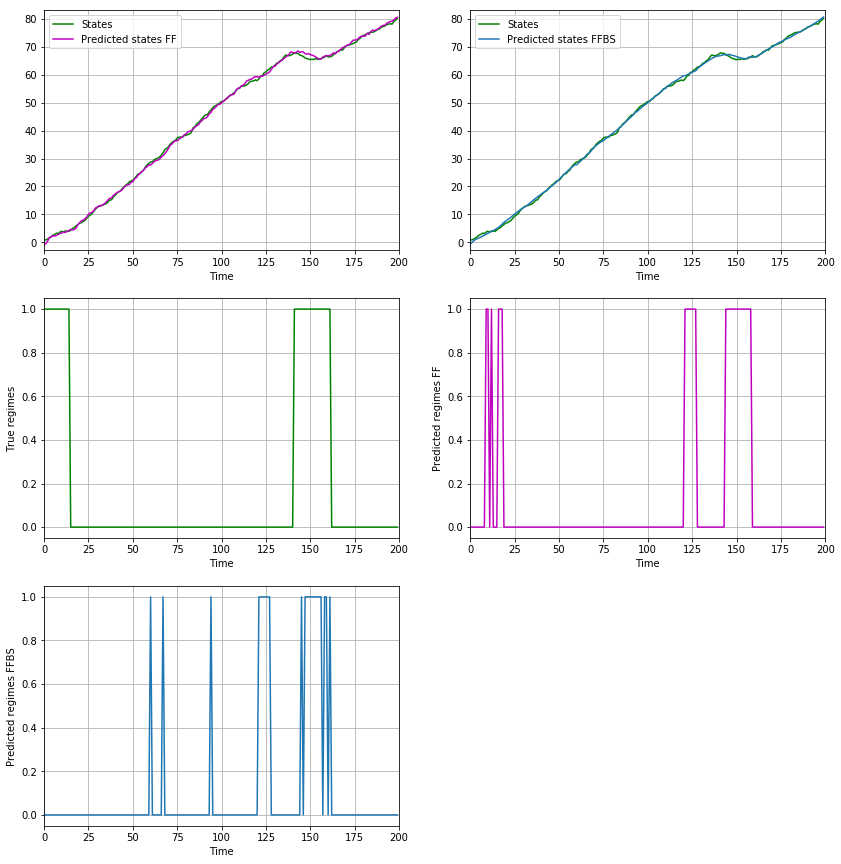

In [28]:
J=2
P0=np.array([.5 , .5])
d=[np.array([.5]),np.array([0])]
c=[np.array([.1]),np.array([0])]
T=[np.array([1]),np.array([1])]
Q=np.array([[.99,.01],[.03,.97]])
B=[np.array([1]),np.array([1])]
H=[np.array([.1**.5]),np.array([.1**.5])]
G=[np.array([1.5**.5]),np.array([1.5**.5])]
N=20
n=200
regime=regimes(J,P0,Q,n)
mu1=np.array([0])
sigma1=np.array([1])
sigma2=np.array([1])

states=create_states(d,T,H,mu1,sigma1,regime)
observations=create_observations(c,B,G,states,regime,mu1,sigma2)

#Forward Filter
z_predicted,a,omega,mu,P=forward_filter(c,d,B,G,T,H,mu1,sigma1,P0,observations,N)

#Backward simulator
a_tilde,mu_tilde_T,P_tilde_T,omega_tilde=backward_simulator(a,omega,mu,P,B,G,T,H,c,d,observations)

mu_tilde=np.ndarray.flatten(np.asarray(mu_tilde_T))

mse1=MSE(states,z_predicted)
mse=MSE(states,mu_tilde)
mse2=MSE(states,observations)
print('MSE for the observations : ',str(mse2)[0:6])
print('MSE for the estimate FF : ', str(mse1)[0:6])
print('MSE for the estimate FFBS : ', str(mse)[0:6])

reg_proba=regime_proba1(a_tilde,omega_tilde,J)
reg_pred=regime_predicted(reg_proba)
switch_pred,indices_pred=switch_detection(reg_pred)
switch,indices=switch_detection(regime)
reg_err=Regime_error(regime,reg_pred)

reg_proba1=regime_proba(a,omega,J)
reg_pred1=regime_predicted(reg_proba1)
switch_pred1,indices_pred1=switch_detection(reg_pred1)
switch1,indices1=switch_detection(regime)
reg_err1=Regime_error(regime,reg_pred1)
print('\n')
print("Vrais indices de chgt de régime : ",indices)
print('\n')
print("Indices de chgt de régime prédits FF : ",indices_pred1)
print('\n')
print("Indices de chgt de régime prédits FFBS : ",indices_pred)
print('\n')
print("Taux d'erreur régimes FF :",str(reg_err1*100)[0:5],"%")
print("Taux d'erreur régimes FFBS :",str(reg_err*100)[0:5],"%")

plt.figure(figsize=(14,15))

plt.subplot(3,2,1)
plt.plot(np.arange(n),states,color='green',label='States')
#plt.plot(np.arange(n),observations,'r+',label='Observations',ls='-',ms=.6,lw=.7)
plt.plot(np.arange(n),z_predicted,'m',label='Predicted states FF')
plt.legend(loc="upper left", fontsize=10)
plt.xlabel('Time', fontsize=10)
plt.xlim(0,n)
plt.ylim(min(observations)-.5,max(observations)+2)
plt.grid()

plt.subplot(3,2,2)
plt.plot(np.arange(n),states,color='green',label='States')
plt.plot(np.arange(n),mu_tilde,label='Predicted states FFBS')
plt.legend(loc="upper left", fontsize=10)
plt.xlabel('Time', fontsize=10)
plt.xlim(0,n)
plt.ylim(min(observations)-.5,max(observations)+2)
plt.grid()

plt.subplot(3,2,3)
plt.plot(np.arange(n),regime,color='green')
plt.xlabel('Time', fontsize=10)
plt.ylabel('True regimes', fontsize=10) 
plt.xlim(0,n)
plt.grid()

plt.subplot(3,2,4)
plt.plot(np.arange(n),reg_pred1,'m')
plt.xlabel('Time', fontsize=10)
plt.ylabel('Predicted regimes FF',fontsize=10)
plt.xlim(0,n)
plt.grid()

plt.subplot(3,2,5)
plt.plot(np.arange(n),reg_pred)
plt.xlabel('Time', fontsize=10)
plt.ylabel('Predicted regimes FFBS', fontsize=10)
plt.grid()
plt.xlim(0,n)

D:\Logiciel\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


MSE for the observations :  0.8599
MSE for the estimate FF :  0.4090
MSE for the estimate FFBS :  0.2074


Vrais indices de chgt de régime :  [129, 196]


Indices de chgt de régime prédits FF :  [1, 12, 73, 74, 76, 79, 130, 169, 170, 198, 211, 212, 226, 228, 240, 247, 249]


Indices de chgt de régime prédits FFBS :  [7, 126, 169, 170, 171, 172, 199, 211, 213, 219, 220, 223, 224, 225, 228, 241, 248, 249]


Taux d'erreur régimes FF : 12.4 %
Taux d'erreur régimes FFBS : 12.0 %


(0, 250)

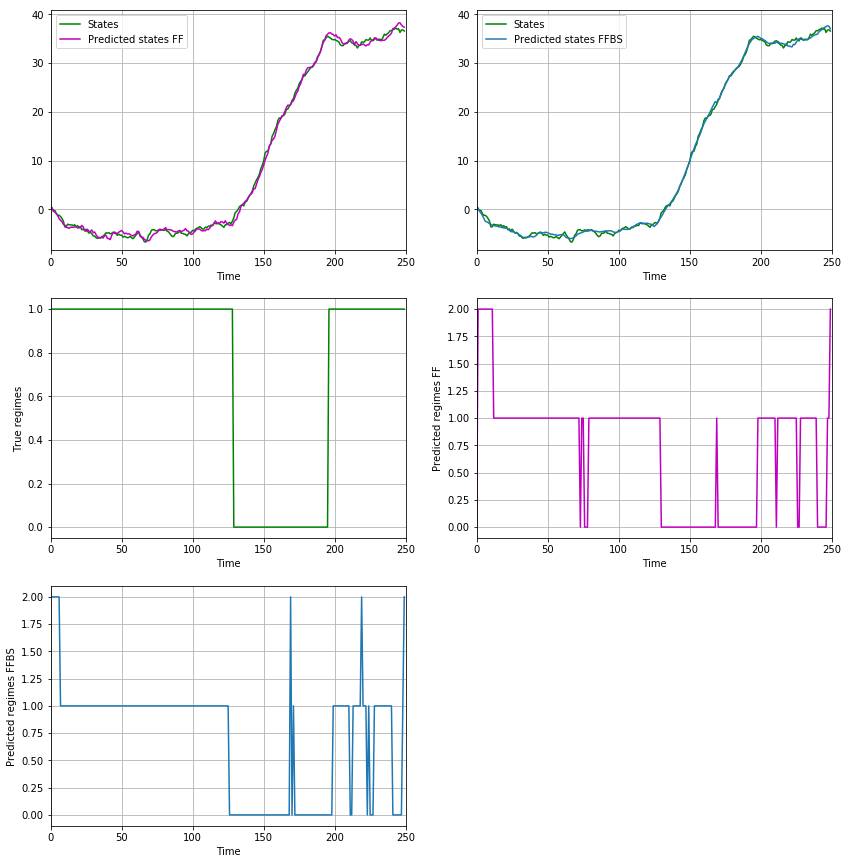

In [33]:
J=3
P0=np.array([0.4, 0.3,0.3])
d=[np.array([0.5]),np.array([0]),np.array([-0.5])]
c=[np.array([0.1]),np.array([0]),np.array([-0.1])]
T=[np.array([1]),np.array([1]),np.array([1])]
Q=np.array([[0.98,.01,0.01],[0.02,0.97,0.01],[0.01,0.03,0.96]])
B=[np.array([1]),np.array([1]),np.array([1])]
H=[np.array([0.1**0.5]),np.array([0.1**0.5]),np.array([0.1**0.5])]
G=[np.array([.9**0.5]),np.array([.9**0.5]),np.array([.9**0.5])]
N=30
n=250
regime=regimes(J,P0,Q,n)
mu1=np.array([0])
sigma1=np.array([1])
sigma2=np.array([1])

states=create_states(d,T,H,mu1,sigma1,regime)
observations=create_observations(c,B,G,states,regime,mu1,sigma2)
e=[20,30,40, 50]

z_predicted,a,omega,mu,P=forward_filter(c,d,B,G,T,H,mu1,sigma1,P0,observations,N)


a_tilde,mu_tilde_T,P_tilde_T,omega_tilde=backward_simulator(a,omega,mu,P,B,G,T,H,c,d,observations)

mu_tilde=np.ndarray.flatten(np.asarray(mu_tilde_T))

mse1=MSE(states,z_predicted)
mse=MSE(states,mu_tilde)
mse2=MSE(states,observations)
print('MSE for the observations : ',str(mse2)[0:6])
print('MSE for the estimate FF : ', str(mse1)[0:6])
print('MSE for the estimate FFBS : ', str(mse)[0:6])

reg_proba=regime_proba1(a_tilde,omega_tilde,J)
reg_pred=regime_predicted(reg_proba)
switch_pred,indices_pred=switch_detection(reg_pred)
switch,indices=switch_detection(regime)
reg_err=Regime_error(regime,reg_pred)

reg_proba1=regime_proba(a,omega,J)
reg_pred1=regime_predicted(reg_proba1)
switch_pred1,indices_pred1=switch_detection(reg_pred1)
switch1,indices1=switch_detection(regime)
reg_err1=Regime_error(regime,reg_pred1)

print('\n')
print("Vrais indices de chgt de régime : ",indices)
print('\n')
print("Indices de chgt de régime prédits FF : ",indices_pred1)
print('\n')
print("Indices de chgt de régime prédits FFBS : ",indices_pred)
print('\n')
print("Taux d'erreur régimes FF :",str(reg_err1*100)[0:5],"%")
print("Taux d'erreur régimes FFBS :",str(reg_err*100)[0:5],"%")

plt.figure(figsize=(14,15))

plt.subplot(3,2,1)
plt.plot(np.arange(n),states,color='green',label='States')
#plt.plot(np.arange(n),observations,'r+',label='Observations',ls='-',ms=.6,lw=.7)
plt.plot(np.arange(n),z_predicted,'m',label='Predicted states FF')
plt.legend(loc="upper left", fontsize=10)
plt.xlabel('Time', fontsize=10)
plt.xlim(0,n)
plt.ylim(min(observations)-.5,max(observations)+2)
plt.grid()

plt.subplot(3,2,2)
plt.plot(np.arange(n),states,color='green',label='States')
plt.plot(np.arange(n),mu_tilde,label='Predicted states FFBS')
plt.legend(loc="upper left", fontsize=10)
plt.xlabel('Time', fontsize=10)
plt.xlim(0,n)
plt.ylim(min(observations)-.5,max(observations)+2)
plt.grid()

plt.subplot(3,2,3)
plt.plot(np.arange(n),regime,color='green')
plt.xlabel('Time', fontsize=10)
plt.ylabel('True regimes', fontsize=10) 
plt.xlim(0,n)
plt.grid()

plt.subplot(3,2,4)
plt.plot(np.arange(n),reg_pred1,'m')
plt.xlabel('Time', fontsize=10)
plt.ylabel('Predicted regimes FF',fontsize=10)
plt.xlim(0,n)
plt.grid()

plt.subplot(3,2,5)
plt.plot(np.arange(n),reg_pred)
plt.xlabel('Time', fontsize=10)
plt.ylabel('Predicted regimes FFBS', fontsize=10)
plt.grid()
plt.xlim(0,n)

In [35]:
J=3
P0=np.array([0.4, 0.3,0.3])
d=[np.array([0.5]),np.array([0]),np.array([-0.5])]
c=[np.array([0.1]),np.array([0]),np.array([-0.1])]
T=[np.array([1]),np.array([1]),np.array([1])]
Q=np.array([[0.98,.01,0.01],[0.02,0.97,0.01],[0.01,0.03,0.96]])
B=[np.array([1]),np.array([1]),np.array([1])]
H=[np.array([0.1**0.5]),np.array([0.1**0.5]),np.array([0.1**0.5])]
G=[np.array([.9**0.5]),np.array([.9**0.5]),np.array([.9**0.5])]
N=30
n=250
regime=regimes(J,P0,Q,n)
mu1=np.array([0])
sigma1=np.array([1])
sigma2=np.array([1])

states=create_states(d,T,H,mu1,sigma1,regime)
observations=create_observations(c,B,G,states,regime,mu1,sigma2)
e=[20,30,40,50,100]
LL=[]
for k in e:
    z_predicted,a,omega,mu,P=forward_filter(c,d,B,G,T,H,mu1,sigma1,P0,observations,k)
    mse1=MSE(states,z_predicted)
    LL.append(mse1)
print(LL)

[0.5498805083925687, 0.5119615991290789, 0.4567279740749827, 0.49370178284322325, 0.4885719172801475]


D:\Logiciel\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


MSE for the observations :  1.0051
MSE for the estimate FF :  0.3540
MSE for the estimate FFBS :  0.2420


Vrais indices de chgt de régime :  [34, 38, 156, 172, 202]


Indices de chgt de régime prédits FF :  [1, 87, 90, 94, 99, 147, 148, 154, 163, 173, 181, 183, 191, 193, 194, 204, 205, 206, 221, 222]


Indices de chgt de régime prédits FFBS :  [56, 57, 79, 80, 86, 87, 88, 89, 90, 91, 92, 94, 97, 98, 99, 113, 114, 132, 133, 142, 143, 145, 146, 147, 148, 154, 164, 175, 181, 183, 185, 191, 193, 196, 203, 204, 207, 208, 209]


Taux d'erreur régimes FF : 15.6 %
Taux d'erreur régimes FFBS : 20.0 %


(0, 250)

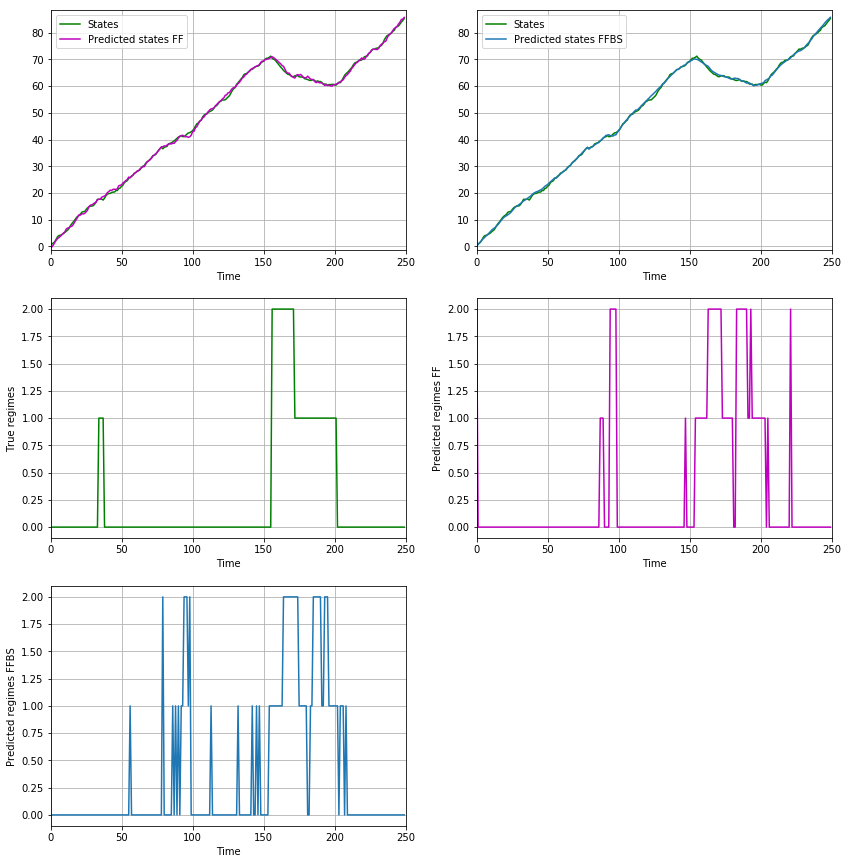

In [31]:
J=3
P0=np.array([0.4, 0.3,0.3])
d=[np.array([0.5]),np.array([0]),np.array([-0.5])]
c=[np.array([0.1]),np.array([0]),np.array([-0.1])]
T=[np.array([1]),np.array([1]),np.array([1])]
Q=np.array([[0.98,.01,0.01],[0.02,0.97,0.01],[0.01,0.03,0.96]])
B=[np.array([1]),np.array([1]),np.array([1])]
H=[np.array([0.1**0.5]),np.array([0.1**0.5]),np.array([0.1**0.5])]
G=[np.array([.9**0.5]),np.array([0.9**0.5]),np.array([0.9**0.5])]
N=20
n=250
regime=regimes(J,P0,Q,n)
mu1=np.array([0])
sigma1=np.array([1])
sigma2=np.array([1])

states=create_states(d,T,H,mu1,sigma1,regime)
observations=create_observations(c,B,G,states,regime,mu1,sigma2)
z_predicted,a,omega,mu,P=forward_filter(c,d,B,G,T,H,mu1,sigma1,P0,observations,N)


a_tilde,mu_tilde_T,P_tilde_T,omega_tilde=backward_simulator(a,omega,mu,P,B,G,T,H,c,d,observations)

mu_tilde=np.ndarray.flatten(np.asarray(mu_tilde_T))

mse1=MSE(states,z_predicted)
mse=MSE(states,mu_tilde)
mse2=MSE(states,observations)
print('MSE for the observations : ',str(mse2)[0:6])
print('MSE for the estimate FF : ', str(mse1)[0:6])
print('MSE for the estimate FFBS : ', str(mse)[0:6])

reg_proba=regime_proba1(a_tilde,omega_tilde,J)
reg_pred=regime_predicted(reg_proba)
switch_pred,indices_pred=switch_detection(reg_pred)
switch,indices=switch_detection(regime)
reg_err=Regime_error(regime,reg_pred)

reg_proba1=regime_proba(a,omega,J)
reg_pred1=regime_predicted(reg_proba1)
switch_pred1,indices_pred1=switch_detection(reg_pred1)
switch1,indices1=switch_detection(regime)
reg_err1=Regime_error(regime,reg_pred1)

print('\n')
print("Vrais indices de chgt de régime : ",indices)
print('\n')
print("Indices de chgt de régime prédits FF : ",indices_pred1)
print('\n')
print("Indices de chgt de régime prédits FFBS : ",indices_pred)
print('\n')
print("Taux d'erreur régimes FF :",str(reg_err1*100)[0:5],"%")
print("Taux d'erreur régimes FFBS :",str(reg_err*100)[0:5],"%")

plt.figure(figsize=(14,15))

plt.subplot(3,2,1)
plt.plot(np.arange(n),states,color='green',label='States')
#plt.plot(np.arange(n),observations,'r+',label='Observations',ls='-',ms=.6,lw=.7)
plt.plot(np.arange(n),z_predicted,'m',label='Predicted states FF')
plt.legend(loc="upper left", fontsize=10)
plt.xlabel('Time', fontsize=10)
plt.xlim(0,n)
plt.ylim(min(observations)-.5,max(observations)+2)
plt.grid()

plt.subplot(3,2,2)
plt.plot(np.arange(n),states,color='green',label='States')
plt.plot(np.arange(n),mu_tilde,label='Predicted states FFBS')
plt.legend(loc="upper left", fontsize=10)
plt.xlabel('Time', fontsize=10)
plt.xlim(0,n)
plt.ylim(min(observations)-.5,max(observations)+2)
plt.grid()

plt.subplot(3,2,3)
plt.plot(np.arange(n),regime,color='green')
plt.xlabel('Time', fontsize=10)
plt.ylabel('True regimes', fontsize=10) 
plt.xlim(0,n)
plt.grid()

plt.subplot(3,2,4)
plt.plot(np.arange(n),reg_pred1,'m')
plt.xlabel('Time', fontsize=10)
plt.ylabel('Predicted regimes FF',fontsize=10)
plt.xlim(0,n)
plt.grid()

plt.subplot(3,2,5)
plt.plot(np.arange(n),reg_pred)
plt.xlabel('Time', fontsize=10)
plt.ylabel('Predicted regimes FFBS', fontsize=10)
plt.grid()
plt.xlim(0,n)

# Crude Oil Prices

In [32]:
import datapackage
import pandas as pd
import os 

path_data='./'
filename='Crude_Oil_Prices_Daily.csv'

data = pd.read_csv(os.path.join(path_data, filename), sep=';',decimal=',',dtype= {'Closing Value': np.float64},parse_dates=['Date'])

In [33]:
data.head(n=5)

,Date,Closing Value
0,1986-02-01,25.56
1,1986-03-01,26.00
2,1986-06-01,26.53
3,1986-07-01,25.85
4,1986-08-01,25.87


In [34]:
data.tail()

,Date,Closing Value
8218,2018-03-07,74.19
8219,2018-04-07,NaN
8220,2018-05-07,73.05
8221,2018-06-07,73.78
8222,2018-09-07,73.93


In [35]:
data.columns

Index(['Date', 'Closing Value'], dtype='object')

In [36]:
data.dtypes

Date             datetime64[ns]
Closing Value           float64
dtype: object

In [37]:
data.shape

(8223, 2)

In [38]:
data.describe(include='all')
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [39]:
data = data.dropna()
data.shape
data.reset_index(inplace=True, drop=True)

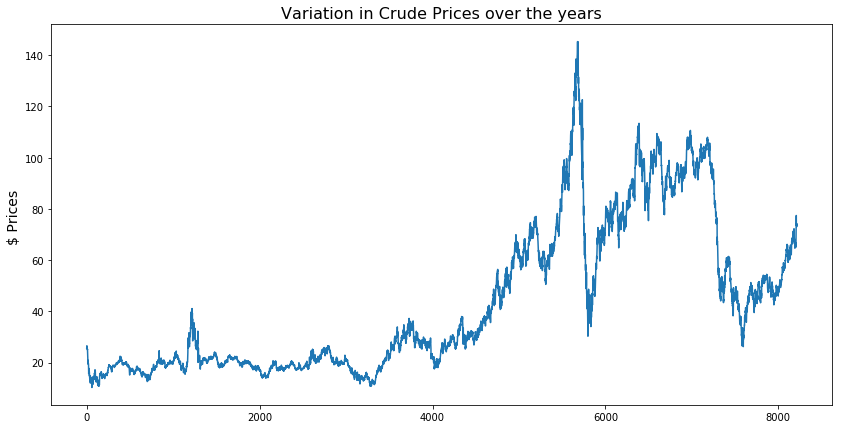

In [106]:
plt.figure(figsize = (14,7));
data['Closing Value'].plot(kind='line');
#print(np.argmin(data['Closing Value'][5680:5800]))
plt.ylabel('$ Prices ',fontsize = 14);
plt.title('Variation in Crude Prices over the years', Fontsize = 16);

In [41]:
data['Closing Value'].describe()

count    8216.000000
mean       43.492139
std        29.616804
min        10.250000
25%        19.577500
50%        29.610000
75%        63.402500
max       145.310000
Name: Closing Value, dtype: float64

1er régime : 
 d = -0.0008874999999999993 
 H^2 = 0.33058452500000174
86.02876985358581


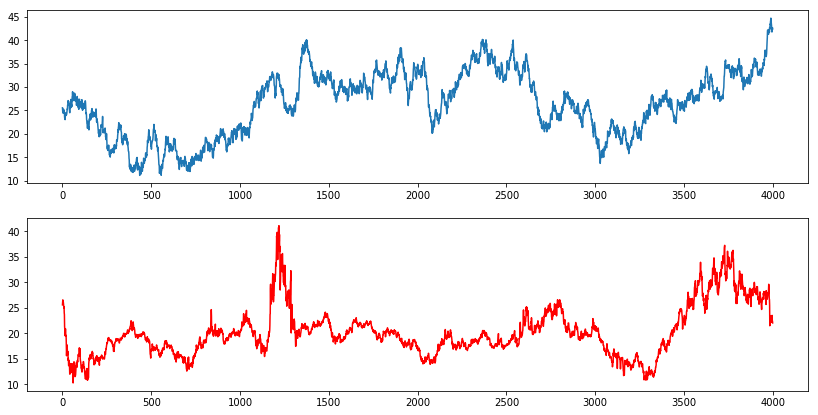

In [141]:
X=data['Closing Value'][0:4000]
n=len(X)
d_1=(X[len(X)-1]-X[0])/len(X)
S=0
for i in range(n-1):
    S+=(X[i+1]-X[i])**2
H_sq_1=S/len(X)
states=np.zeros(n)
states[0]=data['Closing Value'][0]
for i in range(1,n):
    states[i]=d_1+states[i-1]+np.sqrt(H_sq_1)*np.random.normal(0,1)

print(f'1er régime : \n d = {d_1} \n H^2 = {H_sq_1}')
print(MSE(X,states))
      
plt.figure(figsize = (14,7));
plt.subplot(2,1,1)
plt.plot(np.arange(n),states)
plt.subplot(2,1,2)
plt.plot(np.arange(n),X,color='r')

In [83]:
def MSE2(x,y):
    l=len(x)
    mse=[0]*l
    for i in range(l):
        mse[i]=(x[i+4000]-y[i])**2
    return np.array([mse]).mean()

2ème régime : 
 d = 0.071125 
 H^2 = 1.5054243452380958
435.6066224920033


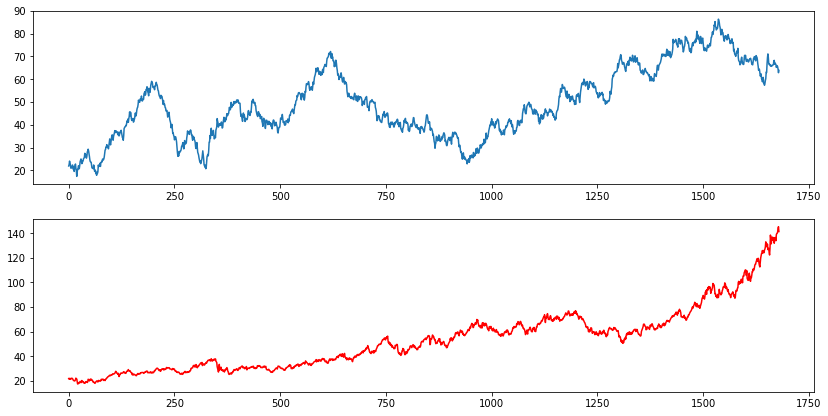

In [115]:
X=data['Closing Value'][4000:5680].copy()
n=len(X)
d_2=(X[len(X)+4000-1]-X[0+4000])/len(X)
S=0
for i in range(n-1):
    S+=(X[i+4000+1]-X[4000+i])**2
H_sq_2=S/len(X)
states=np.zeros(n)
states[0]=data['Closing Value'][4000]
for i in range(1,n):
    states[i]=d_2+states[i-1]+np.sqrt(H_sq_2)*np.random.normal(0,1)
plt.figure(figsize = (14,7));
plt.subplot(2,1,1)
plt.plot(np.arange(n),states)
plt.subplot(2,1,2)
plt.plot(np.arange(n),X,color='r')
print(f'2ème régime : \n d = {d_2} \n H^2 = {H_sq_2}')
print(MSE2(X,states))

In [87]:
def MSE3(x,y):
    l=len(x)
    mse=[0]*l
    for i in range(l):
        mse[i]=(x[i+5680]-y[i])**2
    return np.array([mse]).mean()

3ème régime : 
 d = -0.8889075630252101 
 H^2 = 16.150783193277313
627.7480021276225


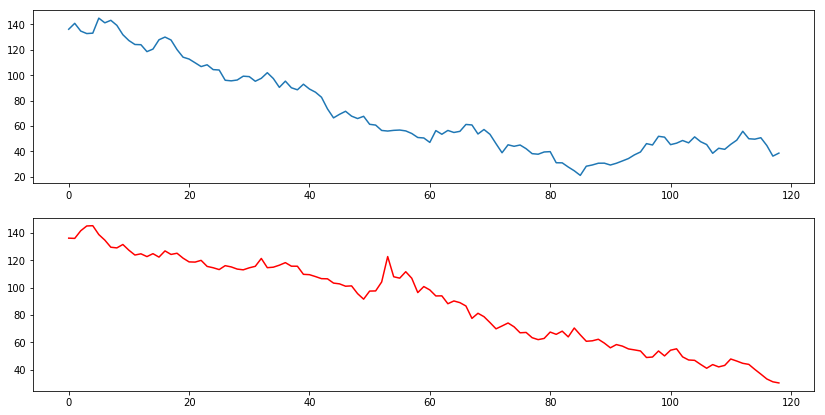

In [114]:
X=data['Closing Value'][5680:5799].copy()
m=5680
n=len(X)
d_3=(X[len(X)+m-1]-X[0+m])/len(X)
S=0
for i in range(n-1):
    S+=(X[i+m+1]-X[m+i])**2
H_sq_3=S/len(X)
states=np.zeros(n)
states[0]=data['Closing Value'][5680]
for i in range(1,n):
    states[i]=d_3+states[i-1]+np.sqrt(H_sq_3)*np.random.normal(0,1)
plt.figure(figsize = (14,7));
plt.subplot(2,1,1)
plt.plot(np.arange(n),states)
plt.subplot(2,1,2)
plt.plot(np.arange(n),X,color='r')
print(f'3ème régime : \n d = {d_3} \n H^2 = {H_sq_3}')
print(MSE3(X,states))

In [111]:
def MSE4(x,y):
    l=len(x)
    mse=[0]*l
    for i in range(l):
        mse[i]=(x[i+5799]-y[i])**2
    return np.array([mse]).mean()

In [ ]:
plt.figure(figsize = (14,7))
data['Closing Value'].plot(kind='line');
plt.grid()

4ème régime : 
 d = 0.05060670949321913 
 H^2 = 2.4213868665239167
2750.7621991651404


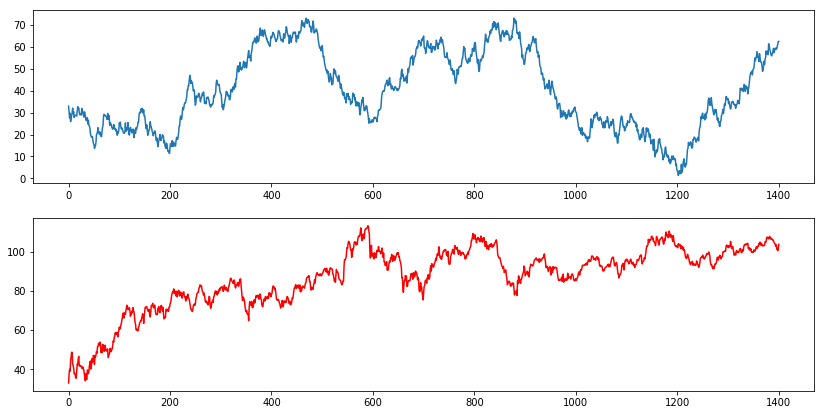

In [167]:
X=data['Closing Value'][5799:7200].copy()
m=5799
n=len(X)
d_4=(X[len(X)+m-1]-X[0+m])/len(X)
S=0
for i in range(n-1):
    S+=(X[i+m+1]-X[m+i])**2
H_sq_4=S/len(X)
states=np.zeros(n)
states[0]=data['Closing Value'][5799]
for i in range(1,n):
    states[i]=d_4+states[i-1]+np.sqrt(H_sq_4)*np.random.normal(0,1)
plt.figure(figsize = (14,7));
plt.subplot(2,1,1)
plt.plot(np.arange(n),states)
plt.subplot(2,1,2)
plt.plot(np.arange(n),X,color='r')
print(f'4ème régime : \n d = {d_4} \n H^2 = {H_sq_4}')
#print(d,H_sq,np.sqrt(H_sq),np.sqrt(1.5054243452380958))
print(MSE4(X,states))
# 0.071125 1.5054243452380958 Même que le régime entre 4000 et le pic

In [172]:
def MSE5(x,y):
    l=len(x)
    mse=[0]*l
    for i in range(l):
        mse[i]=(x[i+7200]-y[i])**2
    return np.array([mse]).mean()

5ème régime : 
 d = -0.029429133858267707 
 H^2 = 1.4947068897637799
4683.07725035151


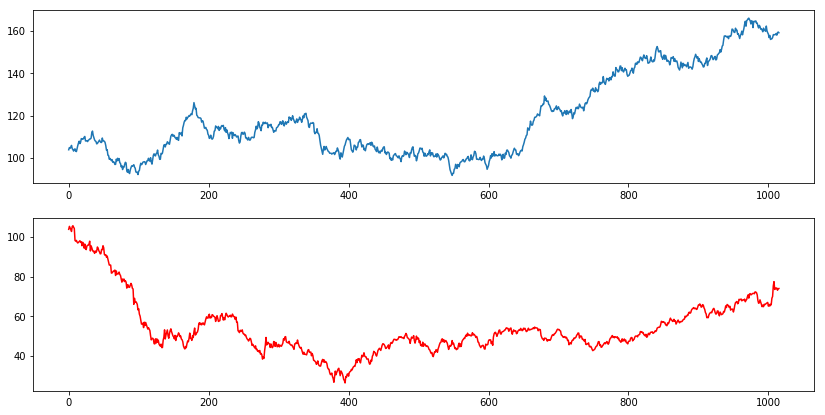

In [232]:
X=data['Closing Value'][7200::].copy()
m=7200
n=len(X)
d_4=(X[len(X)+m-1]-X[0+m])/len(X)
S=0
for i in range(n-1):
    S+=(X[i+m+1]-X[m+i])**2
H_sq_4=S/len(X)
states=np.zeros(n)
states[0]=data['Closing Value'][7200]
for i in range(1,n):
    states[i]=d_4+states[i-1]+np.sqrt(H_sq_4)*np.random.normal(0,1)
plt.figure(figsize = (14,7));
plt.subplot(2,1,1)
plt.plot(np.arange(n),states)
plt.subplot(2,1,2)
plt.plot(np.arange(n),X,color='r')
print(f'5ème régime : \n d = {d_4} \n H^2 = {H_sq_4}')
#print(d,H_sq,np.sqrt(H_sq),np.sqrt(1.5054243452380958))
print(MSE5(X,states))

In [142]:
def drift_estimate(X):
    # X is an array 
    n=len(X)
    S=X[1::].sum()
    S2=X[::n-1].sum()
    S1=0
    S3=0
    S4=0
    for i in range(n-1):
        S1+=(X[i+1]-X[i])*X[i]
        S3+=X[i]**2
        S4+=(X[i+1]-X[i])**2
    T=(1+((X[n-1]-X[0])/n)*S2-S1)/(S3-S2**2/n)
    d=-(X[n-1]-X[0]+(T-1)*S2)/n
    H=S4/n
    return d,T,H

In [143]:
d,T,H_sq=drift_estimate(data['Closing Value'][0:4000])
print(d,T,H_sq)

0.012774866425564213 0.00043166486741955926 0.33058452500000174


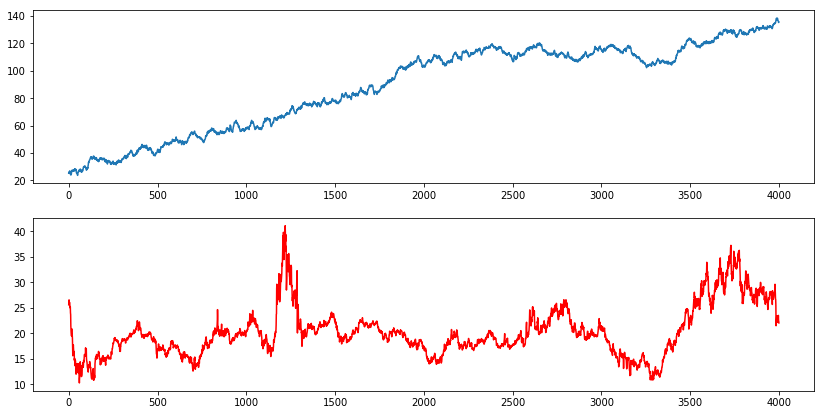

In [146]:
n=4000
states=np.zeros(n)
states[0]=data['Closing Value'][0]
for i in range(1,n):
    states[i]=d+1*states[i-1]+np.sqrt(H_sq)*np.random.normal(0,1)
plt.figure(figsize = (14,7));
plt.subplot(2,1,1)
plt.plot(np.arange(n),states)
plt.subplot(2,1,2)
plt.plot(np.arange(n),data['Closing Value'][0:4000],color='r')

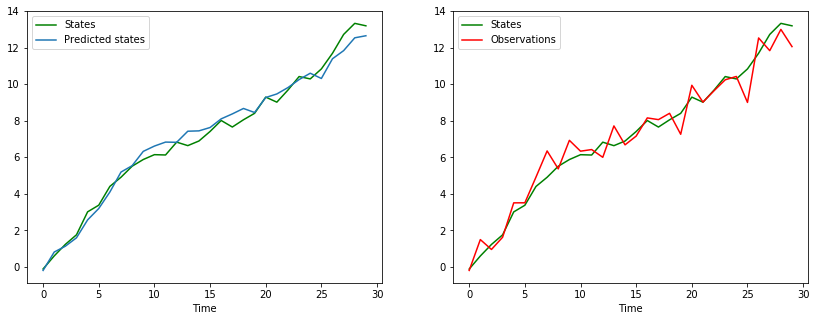

In [237]:
J1=1
P0=np.array([1])
d=[np.array([0.5])]
c=[np.array([0.1])]
T=[np.array([1])]
Q=np.array([[1]])
B=[np.array([1])]
H=[np.array([0.1**0.5])]
G=[np.array([0.5**0.5])]

d1=np.array([0.5])
c1=np.array([0.1])
T1=np.array([1])
Q1=np.array([[1]])
B1=np.array([1])
H1=np.array([0.1**0.5])
G1=np.array([0.5**0.5])

N=12
n=30

regime1=regimes(J1,P0,Q,n)
mu1=np.array([0])
sigma1=np.array([1])
sigma2=np.array([1])

states1=create_states(d,T,H,mu1,sigma1,regime1)
observations1=create_observations(c,B,G,states1,regime1,mu1,sigma2)

#prediction using Forward Filter
z_predicted1,*_=forward_filter(c,d,B,G,T,H,mu1,sigma1,P0,observations1,N)


plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(np.arange(n),states1,color='green',label='States')
plt.plot(np.arange(n),z_predicted1,label='Predicted states')
plt.xlabel('Time', fontsize=10)
plt.legend(loc="upper left", fontsize=10)
plt.subplot(1,2,2)
plt.plot(np.arange(n),states1,color='green',label='States')
plt.plot(np.arange(n),observations1,color='red',label='Observations')
plt.xlabel('Time', fontsize=10)
plt.legend(loc="upper left", fontsize=10)

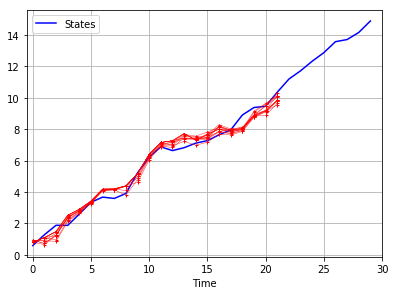

In [454]:
J=3
P0=np.array([0.4, 0.3,0.3])
d=[np.array([0.5]),np.array([0]),np.array([-0.5])]
c=[np.array([0.1]),np.array([0]),np.array([-0.1])]
T=[np.array([1]),np.array([1]),np.array([1])]
Q=np.array([[0.98,.01,0.01],[0.02,0.97,0.01],[0.01,0.03,0.96]])
B=[np.array([1]),np.array([1]),np.array([1])]
H=[np.array([0.1**0.5]),np.array([0.1**0.5]),np.array([0.1**0.5])]
G=[np.array([0.5**0.5]),np.array([0.5**0.5]),np.array([0.5**0.5])]
N=12

n=30
regime=regimes(J,P0,Q,n)
mu1=np.array([0])
sigma1=np.array([1])
sigma2=np.array([1])

states=create_states(d,T,H,mu1,sigma1,regime)
observations=create_observations(c,B,G,states,regime,mu1,sigma2)
z_predicted,a,omega,mu,P=forward_filter(c,d,B,G,T,H,mu1,sigma1,P0,observations,N)


reg_proba=regime_proba(a,omega,J)
reg_pred=regime_predicted(reg_proba)
switch_pred,indices_pred=switch_detection(reg_pred)
switch,indices=switch_detection(regime)
reg_err=Regime_error(regime,reg_pred)


plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.plot(np.arange(n),states,color='blue',label='States')
#plt.plot(np.arange(n),z_predicted,label='Predicted states')
L=[]
for k in range(N):
    L2=[]
    for i in range(22):
        L2.append(mu[i][k])
        #z_i+= omega[k][i]*mu[i][k]
    L.append(L2)
for k in range(N):
    plt.plot(np.arange(22),L[k],'r+',lw=.4,ls='-',ms=3)
plt.legend(loc="upper left", fontsize=10)
plt.xlabel('Time', fontsize=10)
plt.xlim(-.5,30)
plt.grid()